# Load in the data and normalise

This takes a while so I add print statements to show when it's done...

In [3]:
! ls -l ../dataset/

total 156656392
-rw-r--r--  1 sarmadtarar  staff      3258527 23 Apr 16:47 dataset_sample.csv
-rw-r--r--@ 1 sarmadtarar  staff    176473873 27 Apr 13:30 groupby_results_weekdayy_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff    169368141 27 Apr 13:30 groupby_results_weekend_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff  39929480142 24 Apr 17:12 qut_it_capstone_ailbatross_20181029_nmi_data_20181029.csv
-rw-r--r--@ 1 sarmadtarar  staff  28630797979 25 Apr 16:20 weekday_split_weekdays.csv
-rw-r--r--@ 1 sarmadtarar  staff  11298682219 25 Apr 16:30 weekday_split_weekends.csv


In [7]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numeric_columns = [f'ekw{i+1}' for i in range(48)]

scaler = MinMaxScaler()

weekends_df = pd.read_csv('../dataset/groupby_results_weekend_groupby_means.csv', index_col='nmi_uuid')
weekdays_df = pd.read_csv('../dataset/groupby_results_weekdayy_groupby_means.csv', index_col='nmi_uuid')

weekends_df[numeric_columns] = scaler.fit_transform(
                                    weekends_df[numeric_columns].transpose()
                                ).transpose()

weekdays_df[numeric_columns] = scaler.fit_transform(
                                    weekdays_df[numeric_columns].transpose()
                                ).transpose()

print('Data is normalised and ready to be processed')

Data is normalised and ready to be processed


# Sanity Check

Remove bad rows

In [4]:
bad_rows = weekdays_df[~(weekdays_df[[f'ekw{i+1}' for i in range(48)]] > 0.99).any(axis=1)] # all rows should range between 0 and 1

bad_rows.head() # these rows have something wrong with them..

,ekw1,ekw2,ekw3,ekw4,ekw5,ekw6,ekw7,ekw8,ekw9,ekw10,...,ekw39,ekw40,ekw41,ekw42,ekw43,ekw44,ekw45,ekw46,ekw47,ekw48
nmi_uuid,,,,,,,,,,,,,,,,,,,,,
2b06621a-9e3e-4986-a198-c5b3c9efcdc8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2676328b-cac3-4801-b6ef-09d25e9696e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46096c69-b0fb-4c3d-b33c-752a014fcb03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5c58d972-e817-45de-8b49-87db5d2c582e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6b55398d-48d5-478b-aa17-702a4d1b4ee6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
weekdays_df = weekdays_df[(weekdays_df[[f'ekw{i+1}' for i in range(48)]] > 0.99).any(axis=1)] # all rows should range between 0 and 1

weekdays_df.head()

,ekw1,ekw2,ekw3,ekw4,ekw5,ekw6,ekw7,ekw8,ekw9,ekw10,...,ekw39,ekw40,ekw41,ekw42,ekw43,ekw44,ekw45,ekw46,ekw47,ekw48
nmi_uuid,,,,,,,,,,,,,,,,,,,,,
01501e2a-6bbe-4bfd-918e-2d85eee45f8e,0.120782,0.109508,0.118368,0.108763,0.116053,0.104127,0.104162,0.107573,0.108105,0.110751,...,0.351077,0.321966,0.293521,0.257767,0.210283,0.199639,0.175513,0.164223,0.145637,0.136495
01a31d80-6a98-429d-93c6-567ff11077e2,0.091323,0.090195,0.089392,0.088355,0.088083,0.086669,0.083807,0.084286,0.095397,0.089243,...,0.524905,0.411382,0.388932,0.319177,0.315517,0.232630,0.131814,0.100311,0.093950,0.087924
02a13550-4dd8-45ee-9a10-94e185600587,0.210308,0.202774,0.194541,0.203084,0.193066,0.191343,0.188212,0.188572,0.188522,0.192813,...,0.706352,0.673231,0.676356,0.779257,0.942496,1.000000,0.892616,0.648201,0.427582,0.291108
02cc9895-6187-4811-9360-a1ad1d0f7ac4,0.230641,0.208774,0.206221,0.158032,0.204968,0.209424,0.162071,0.191179,0.170659,0.151764,...,1.000000,0.784540,0.859564,0.796518,0.715135,0.521588,0.449907,0.355571,0.331151,0.349257
02fd804c-7a3a-4013-b6dd-dfeef7a8ced4,0.392683,0.442123,0.407842,0.361642,0.362473,0.331244,0.296534,0.196984,0.263030,0.264878,...,0.645214,0.599095,0.746853,1.000000,0.859660,0.675023,0.593015,0.578258,0.591864,0.504124


# Test KMeans on a range of n_cluster values

We will be testing inter- and intra- cluster variances. We want to find the point where inter- cluster variances are at the highest, whereas intra- cluster variances are at the lowest. Both these criteria are just as important as each other, so it's best to get as close to the middle as possible.

This is mostly for visualisation purposes - so I scaled the variation calcs such that they fit on the same graph.


In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

numeric_data = np.asarray(
    weekdays_df[[f'ekw{i+1}' for i in range(48)]]
)

#clean up nans - this should have been weeded out in the previous cell anyway
nans = np.any(np.isnan(numeric_data), axis=1)
numeric_data = numeric_data[~nans]

intra_cluster_variances = np.zeros(27)
inter_cluster_variances = np.zeros(27)

for n_clusters in range(3, 30):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=20).fit(numeric_data)
    cluster_indices = kmeans.predict(numeric_data)
    
    # intra-cluster variance:
    total_intracluster_variance = np.zeros((1, 48))
    for i in range(n_clusters):
        cluster_subset = numeric_data[cluster_indices == i]
        variance = np.var(cluster_subset, axis=0) # variance along each column, NOT the flattened array
        total_intracluster_variance += variance
    
    # inter-cluster variance:
    intercluster_variance = np.var(kmeans.cluster_centers_, axis=0)
    intercluster_variance = intercluster_variance / intercluster_variance.max()
    
    intra_cluster_variances[n_clusters - 3] = np.mean(total_intracluster_variance / total_intracluster_variance.max())
    inter_cluster_variances[n_clusters - 3] = np.mean(intercluster_variance)
    
    print(f'Intra-cluster variance @ {n_clusters}', intra_cluster_variances[n_clusters - 3])
    print(f'Inter-cluster variance @ {n_clusters}', intercluster_variance[n_clusters - 3])
    
print('Done!')

Intra-cluster variance @ 3 0.6068521420367342
Inter-cluster variance @ 3 0.07552278111349285
Intra-cluster variance @ 4 0.5763860220959713
Inter-cluster variance @ 4 0.15585099547371542
Intra-cluster variance @ 5 0.5511046304187001
Inter-cluster variance @ 5 0.2521457808278667
Intra-cluster variance @ 6 0.5030850459894619
Inter-cluster variance @ 6 0.2065302755788412
Intra-cluster variance @ 7 0.5006958610517794
Inter-cluster variance @ 7 0.3295717609447482
Intra-cluster variance @ 8 0.48436958973561267
Inter-cluster variance @ 8 0.2670740422516094
Intra-cluster variance @ 9 0.47982454788520545
Inter-cluster variance @ 9 0.40694128153303427
Intra-cluster variance @ 10 0.5247123212508736
Inter-cluster variance @ 10 0.3304568530784952
Intra-cluster variance @ 11 0.5403337824404243
Inter-cluster variance @ 11 0.3750261130656332
Intra-cluster variance @ 12 0.5269709790404549
Inter-cluster variance @ 12 0.3369873382492366
Intra-cluster variance @ 13 0.5363884359668675
Inter-cluster variance

# Plot variances

This is a tricky problem - how much weight do we put on inter-cluster variance and how much weight do we put on intr-cluster variance? For now, let's just assume equal weight.

/Users/sarmadtarar/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


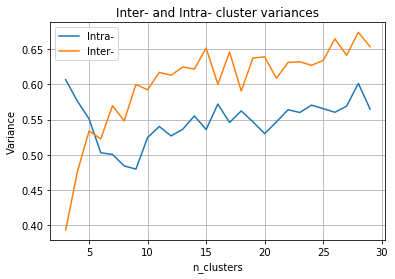

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(3, 30), intra_cluster_variances)
plt.plot(range(3, 30), inter_cluster_variances)
plt.grid('on')
plt.xlabel('n_clusters')
plt.ylabel('Variance')
plt.title('Inter- and Intra- cluster variances')
plt.legend(['Intra-', 'Inter-'])

